# Patient Data Analysis

In [1]:
import pandas as pd
#Load the train dataset to a variable TrainDataset
TrainDataset = pd.read_csv('Train.csv', engine='python')
TrainDataset.head()

,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag
0,FORUMS,cafepharma.com,http://cafepharma.com/boards/threads/epstein.5...,6/15/2016,13:58:00,6/15/2016 23:28,Epstein,I don't disagree with you in principle. I'm ju...,0
1,FORUMS,www.patient.co.uk,http://www.patient.co.uk/forums/discuss/enlarg...,5/7/2016,0.820833333,42498.21667,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1
2,BLOG,http://abcnewsradioonline.com/entertainment-news,http://abcnewsradioonline.com/entertainment-ne...,4/14/2016,15:00:38,4/15/2016 0:30,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0
3,FORUMS,www.cancer-forums.net,http://www.cancer-forums.net/viewtopic.php?f=1...,6/18/2016,20:46:00,6/19/2016 6:16,Bulaemia,I am 17 and I have been throwing up for about ...,1
4,FORUMS,www.diyaudio.com,http://www.diyaudio.com/forums/lounge/292252-d...,6/15/2016,3:26:00,6/15/2016 12:56,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0


In [2]:
#Details of Training Dataset
TrainDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 9 columns):
Source             1157 non-null object
Host               1098 non-null object
Link               1157 non-null object
Date(ET)           1157 non-null object
Time(ET)           1157 non-null object
time(GMT)          996 non-null object
Title              941 non-null object
TRANS_CONV_TEXT    1156 non-null object
Patient_Tag        1157 non-null int64
dtypes: int64(1), object(8)
memory usage: 81.5+ KB


In [3]:
#Load the test dataset to a variable TestDataset
TestDataset = pd.read_csv('test.csv', engine='python')
TestDataset.head()

,Index,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Unnamed: 9
0,1,BLOG,uhmagonline.com,http://uhmagonline.com/son-of-the-late-kimbo-s...,7/30/2016,0:41:23,NaN,NaN,"Baby Slice, the son of the late Kimbo Slice, h...",NaN
1,2,FORUMS,implantinformationnetwork.yuku.com,http://implantinformationnetwork.yuku.com/topi...,6/20/2016,0:07:30,6/20/2016 9:37,My Story --,"<p><font face=""sans-serif"" size=""3"">I have had...",NaN
2,3,BLOG,http://cestlapharm.blogspot.com,http://cestlapharm.blogspot.com/2016/06/us-fda...,6/15/2016,15:44:00,6/16/2016 1:14,US FDA ?????canagliflozin?dapagliflozin?????????,"Previously, sodium-glucose cotransporter-2 (SG...",NaN
3,4,FORUMS,healthboards.com,http://www.healthboards.com/boards/heart-disor...,7/17/2016,19:41:00,NaN,NaN,Hello. I suffer from congestive heart failure ...,NaN
4,5,BLOG,http://www.sciencecodex.com,http://www.sciencecodex.com/vitamin_d_improves...,4/4/2016,15:30:45,4/5/2016 1:00,"Vitamin D improves heart function, study finds",A daily dose of vitamin D3 improves heart func...,NaN


In [4]:
#Details of Test Dataset
TestDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 10 columns):
Index              571 non-null int64
Source             571 non-null object
Host               541 non-null object
Link               571 non-null object
Date(ET)           571 non-null object
Time(ET)           571 non-null object
time(GMT)          480 non-null object
Title              454 non-null object
TRANS_CONV_TEXT    571 non-null object
Unnamed: 9         1 non-null object
dtypes: int64(1), object(9)
memory usage: 44.7+ KB


## Data Visualization

In [5]:
#Visualize feature Date(ET)
#Function to visualize correct format of Date(ET)
import time
def RightFormat(data):
    if '=' in data['Date(ET)']:
        return data['Time(ET)']
    else:
        return data['Date(ET)']

In [6]:
# Applying function RightFormat to filter dates in right format
TrainDataset['Date(ET)'] = TrainDataset.apply(RightFormat, axis=1)
TrainDataset.head()

,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag
0,FORUMS,cafepharma.com,http://cafepharma.com/boards/threads/epstein.5...,6/15/2016,13:58:00,6/15/2016 23:28,Epstein,I don't disagree with you in principle. I'm ju...,0
1,FORUMS,www.patient.co.uk,http://www.patient.co.uk/forums/discuss/enlarg...,5/7/2016,0.820833333,42498.21667,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1
2,BLOG,http://abcnewsradioonline.com/entertainment-news,http://abcnewsradioonline.com/entertainment-ne...,4/14/2016,15:00:38,4/15/2016 0:30,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0
3,FORUMS,www.cancer-forums.net,http://www.cancer-forums.net/viewtopic.php?f=1...,6/18/2016,20:46:00,6/19/2016 6:16,Bulaemia,I am 17 and I have been throwing up for about ...,1
4,FORUMS,www.diyaudio.com,http://www.diyaudio.com/forums/lounge/292252-d...,6/15/2016,3:26:00,6/15/2016 12:56,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0


In [7]:
TestDataset['Date(ET)'] = TestDataset.apply(RightFormat, axis=1)
TestDataset.head()

,Index,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Unnamed: 9
0,1,BLOG,uhmagonline.com,http://uhmagonline.com/son-of-the-late-kimbo-s...,7/30/2016,0:41:23,NaN,NaN,"Baby Slice, the son of the late Kimbo Slice, h...",NaN
1,2,FORUMS,implantinformationnetwork.yuku.com,http://implantinformationnetwork.yuku.com/topi...,6/20/2016,0:07:30,6/20/2016 9:37,My Story --,"<p><font face=""sans-serif"" size=""3"">I have had...",NaN
2,3,BLOG,http://cestlapharm.blogspot.com,http://cestlapharm.blogspot.com/2016/06/us-fda...,6/15/2016,15:44:00,6/16/2016 1:14,US FDA ?????canagliflozin?dapagliflozin?????????,"Previously, sodium-glucose cotransporter-2 (SG...",NaN
3,4,FORUMS,healthboards.com,http://www.healthboards.com/boards/heart-disor...,7/17/2016,19:41:00,NaN,NaN,Hello. I suffer from congestive heart failure ...,NaN
4,5,BLOG,http://www.sciencecodex.com,http://www.sciencecodex.com/vitamin_d_improves...,4/4/2016,15:30:45,4/5/2016 1:00,"Vitamin D improves heart function, study finds",A daily dose of vitamin D3 improves heart func...,NaN


In [8]:
#Converting Date(ET) column to datetime format
TrainDataset['Date(ET)'] = pd.to_datetime(TrainDataset['Date(ET)']) 
TestDataset['Date(ET)'] = pd.to_datetime(TestDataset['Date(ET)']) 

In [9]:
#Start and end data of transactions in training data
print("Transaction start date: ",min(TrainDataset['Date(ET)']))
print("Transaction end date: ", max(TrainDataset['Date(ET)']))

Transaction start date:  2016-02-01 00:00:00
Transaction end date:  2016-07-31 00:00:00


In [10]:
#Start and end data of transactions in training data
print("Transaction start date: ",min(TestDataset['Date(ET)']))
print("Transaction end date: ", max(TestDataset['Date(ET)']))

Transaction start date:  2016-02-01 00:00:00
Transaction end date:  2016-07-31 00:00:00


### Start and end data of transactions in training data and test data shows that the data in training and test set is from same time period.

In [11]:
#Converting Date to month and year
TrainDataset['Month'] = TrainDataset['Date(ET)'].dt.month
TrainDataset['Year'] = TrainDataset['Date(ET)'].dt.year

In [12]:
TestDataset['Month'] = TestDataset['Date(ET)'].dt.month
TestDataset['Year'] = TestDataset['Date(ET)'].dt.year

In [13]:
#Visualize the Y variable i.e. Patient_Tag
TrainDataset['Patient_Tag'].value_counts().plot('bar')

/Users/kashikapuri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


### The above plot of Patient_Tag shows that the data is highly unbalanced. The count of Patient_Tag = 1 is very high as compared to Patient_Tag = 0.

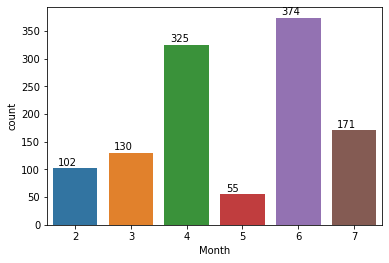

In [14]:
#Visualize Month 
import seaborn as sns
ax = sns.countplot(x="Month", data=TrainDataset)

for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### The above plot shows monthly count. The count in 6th month is higher as compared to others.

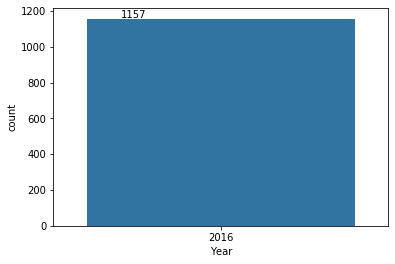

In [15]:
ax = sns.countplot(x="Year", data=TrainDataset)

for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### The above plot shows that there is only 1 value in the year column i.e. 2016. Because of the presence of only 1 value in this year variable, there is no significance in this variable.

In [16]:
#Drop year column due to no significance
#Drop Date(ET) as month is extracted from it.
TrainDataset.drop(['Date(ET)','Year'], axis = 1, inplace = True)
TestDataset.drop(['Date(ET)','Year'], axis = 1, inplace = True)

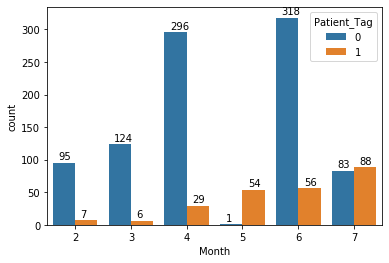

In [17]:
ax = sns.countplot(x="Month", hue="Patient_Tag", data=TrainDataset)

for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### The above plot  shows the monthly count corresponding to each tag. This shows that there is relation in month and tag.

/Users/kashikapuri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


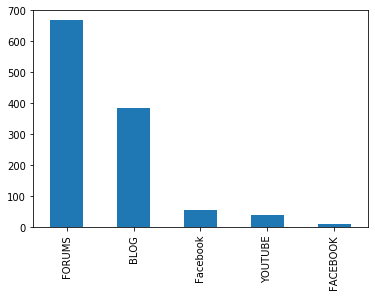

In [18]:
#Visualize Source column 
TrainDataset['Source'].value_counts().plot('bar')

In [19]:
#There is a need to uncapitilize the column as the results are duplicating
TrainDataset['Source'] = TrainDataset['Source'].apply(lambda x: x.lower())

/Users/kashikapuri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


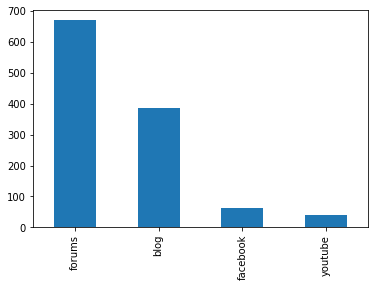

In [20]:
TrainDataset['Source'].value_counts().plot('bar')

### The above plot shows the count of Source column. The maximum count from Forums.

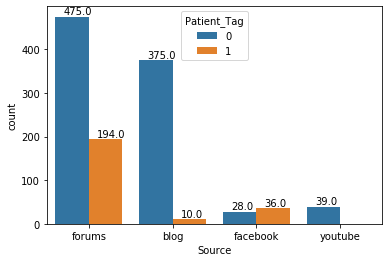

In [21]:
ax = sns.countplot(x="Source", hue="Patient_Tag", data=TrainDataset)

for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### The above plot shows the count of Source column corresponding to each tag. This shows that there is relation in source and tag.

In [22]:
# Convert Source to a numerical variable
DummiesSourceTrain = pd.get_dummies(TrainDataset['Source'], prefix = 'Source')
DummiesSourceTrain.head()

,Source_blog,Source_facebook,Source_forums,Source_youtube
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0


/Users/kashikapuri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


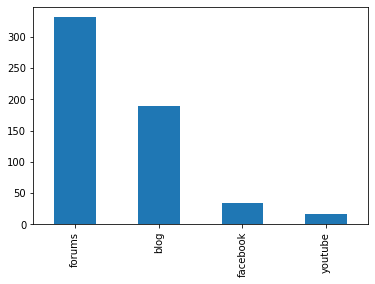

In [23]:
TestDataset['Source'] = TestDataset['Source'].apply(lambda x: x.lower())
TestDataset['Source'].value_counts().plot('bar')

In [24]:
DummiesSourceTest = pd.get_dummies(TestDataset['Source'], prefix = 'Source')
DummiesSourceTest.head()

,Source_blog,Source_facebook,Source_forums,Source_youtube
0,1,0,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0


In [25]:
#Avoid Dummy variable trap
DummiesSourceTrain = DummiesSourceTrain.drop('Source_blog', axis=1)
DummiesSourceTest = DummiesSourceTest.drop('Source_blog', axis=1)

In [26]:
#Add the numerical data to original dataset
TrainDataset = pd.concat([TrainDataset, DummiesSourceTrain], axis=1)
TestDataset = pd.concat([TestDataset, DummiesSourceTest], axis=1)

In [27]:
TrainDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 12 columns):
Source             1157 non-null object
Host               1098 non-null object
Link               1157 non-null object
Time(ET)           1157 non-null object
time(GMT)          996 non-null object
Title              941 non-null object
TRANS_CONV_TEXT    1156 non-null object
Patient_Tag        1157 non-null int64
Month              1157 non-null int64
Source_facebook    1157 non-null uint8
Source_forums      1157 non-null uint8
Source_youtube     1157 non-null uint8
dtypes: int64(2), object(7), uint8(3)
memory usage: 84.9+ KB


In [28]:
TestDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 13 columns):
Index              571 non-null int64
Source             571 non-null object
Host               541 non-null object
Link               571 non-null object
Time(ET)           571 non-null object
time(GMT)          480 non-null object
Title              454 non-null object
TRANS_CONV_TEXT    571 non-null object
Unnamed: 9         1 non-null object
Month              571 non-null int64
Source_facebook    571 non-null uint8
Source_forums      571 non-null uint8
Source_youtube     571 non-null uint8
dtypes: int64(2), object(8), uint8(3)
memory usage: 46.4+ KB


In [29]:
#Drop Source as numerical data is extracted from it.
TrainDataset.drop(['Source'], axis = 1, inplace = True)
TestDataset.drop(['Source'], axis = 1, inplace = True)

In [30]:
#Function to define Null Percentage
import numpy as np
def getNullPercentages(df):
    return np.round(pd.isnull(df).sum()/len(df)*100,4).sort_values(ascending = False)

In [31]:
#Checking the perecentages of nulls in the columns
getNullPercentages(TrainDataset)

Title              18.6690
time(GMT)          13.9153
Host                5.0994
TRANS_CONV_TEXT     0.0864
Source_youtube      0.0000
Source_forums       0.0000
Source_facebook     0.0000
Month               0.0000
Patient_Tag         0.0000
Time(ET)            0.0000
Link                0.0000
dtype: float64

In [32]:
#Dropping rows containing nulls in the TRANS_CONV_TEXT as they are very less
TrainDataset = TrainDataset.loc[~pd.isnull(TrainDataset['TRANS_CONV_TEXT'])]

In [33]:
getNullPercentages(TrainDataset)

Title              18.6851
time(GMT)          13.9273
Host                5.1038
Source_youtube      0.0000
Source_forums       0.0000
Source_facebook     0.0000
Month               0.0000
Patient_Tag         0.0000
TRANS_CONV_TEXT     0.0000
Time(ET)            0.0000
Link                0.0000
dtype: float64

In [34]:
# Visualize Host and Link 
for name in ['Host','Link']:
    print("Unique Values in column: {}\n".format(name))
    print(TrainDataset[name].value_counts(),'\n')

Unique Values in column: Host

www.reddit.com                   57
http://www.youtube.com           23
reddit.com                       19
boards.4chan.org                 18
youtube.com                      16
                                 ..
bbnewsjpbot.blog.fc2.com          1
goerie.com                        1
http://wwj.cbslocal.com           1
forum.nasaspaceflight.com         1
http://mgwarrier.blogspot.com     1
Name: Host, Length: 615, dtype: int64 

Unique Values in column: Link

http://www.dailystrength.org/c/Heart_Failure/forum/21593173-brand-new-diagnosed-last-week#                                                                                 2
http://www.quitsmokingmessageboard.com/index.php?/topic/70488-where-does-the-time-go/                                                                                      2
http://www.biospace.com/news_story.aspx?StoryID=413543&full=1                                                                                               

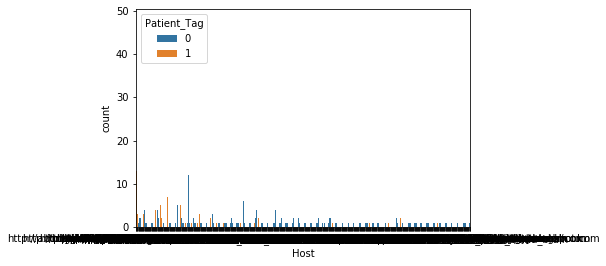

In [35]:
ax = sns.countplot(x="Host", hue="Patient_Tag", data=TrainDataset)

### There are so many values for Host and Link. Moreover Link is even unique for all rows. The above plot is not even showing much relation between Host or Link and Patient_tag

In [36]:
#Drop Host and Link 
TrainDataset.drop(['Link','Host'], axis = 1, inplace = True)
TestDataset.drop(['Link','Host'], axis = 1, inplace = True)

In [37]:
#Visualize Time(ET)
#Function to visualize right format of Time(ET)
import time
def RightFormat(data):
    if('.' in data['Time(ET)']):
        return (time.strftime('%H:%M:%S', time.gmtime(float(data['time(GMT)']))))
    elif('/' in data['Time(ET)']):
        return data['time(GMT)']
    else:
        return data['Time(ET)']

In [38]:
# Applying function RightFormat to filter time in right format
TrainDataset['Time(ET)'] = TrainDataset.apply(RightFormat, axis=1)
TrainDataset.head()

,Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag,Month,Source_facebook,Source_forums,Source_youtube
0,13:58:00,6/15/2016 23:28,Epstein,I don't disagree with you in principle. I'm ju...,0,6,0,1,0
1,11:48:18,42498.21667,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1,5,0,1,0
2,15:00:38,4/15/2016 0:30,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0,4,0,0,0
3,20:46:00,6/19/2016 6:16,Bulaemia,I am 17 and I have been throwing up for about ...,1,6,0,1,0
4,3:26:00,6/15/2016 12:56,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0,6,0,1,0


In [39]:
TestDataset['Time(ET)'] = TestDataset.apply(RightFormat, axis=1)
TestDataset.head()

,Index,Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Unnamed: 9,Month,Source_facebook,Source_forums,Source_youtube
0,1,0:41:23,NaN,NaN,"Baby Slice, the son of the late Kimbo Slice, h...",NaN,7,0,0,0
1,2,0:07:30,6/20/2016 9:37,My Story --,"<p><font face=""sans-serif"" size=""3"">I have had...",NaN,6,0,1,0
2,3,15:44:00,6/16/2016 1:14,US FDA ?????canagliflozin?dapagliflozin?????????,"Previously, sodium-glucose cotransporter-2 (SG...",NaN,6,0,0,0
3,4,19:41:00,NaN,NaN,Hello. I suffer from congestive heart failure ...,NaN,7,0,1,0
4,5,15:30:45,4/5/2016 1:00,"Vitamin D improves heart function, study finds",A daily dose of vitamin D3 improves heart func...,NaN,4,0,0,0


In [40]:
#Function to convert Time(ET) having AM-PM format 
def AM_PM(df):
    if df['Time(ET)'][-2:] == "AM" and df['Time(ET)'][:2] == "12":
        return "00" + df['Time(ET)'][2:-3] + ":00"
               
    elif df['Time(ET)'][-2:] == "AM": 
        return df['Time(ET)'][:-3] + ":00"
        
    elif df['Time(ET)'][-2:] == "PM" and df['Time(ET)'][:2] == "12": 
        return df['Time(ET)'][:-3] + ":00"
    
    elif df['Time(ET)'][-2:] == "PM" and (df['Time(ET)'][:2] == "11" or df['Time(ET)'][:2] == "10"): 
        return str(int(df['Time(ET)'][:2]) + 12) + df['Time(ET)'][2:-3] + ":00"
          
    elif df['Time(ET)'][-2:] == "PM":
        return str(int(df['Time(ET)'][:1]) + 12) + df['Time(ET)'][1:-3] + ":00"
    
    else: 
        return df['Time(ET)']

In [41]:
# Applying function AM_PM to convert time in required format
TrainDataset['Time'] = TrainDataset.apply(AM_PM, axis=1)
TrainDataset.head()

,Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag,Month,Source_facebook,Source_forums,Source_youtube,Time
0,13:58:00,6/15/2016 23:28,Epstein,I don't disagree with you in principle. I'm ju...,0,6,0,1,0,13:58:00
1,11:48:18,42498.21667,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1,5,0,1,0,11:48:18
2,15:00:38,4/15/2016 0:30,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0,4,0,0,0,15:00:38
3,20:46:00,6/19/2016 6:16,Bulaemia,I am 17 and I have been throwing up for about ...,1,6,0,1,0,20:46:00
4,3:26:00,6/15/2016 12:56,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0,6,0,1,0,3:26:00


In [42]:
TestDataset['Time'] = TestDataset.apply(AM_PM, axis=1)
TestDataset.head()

,Index,Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Unnamed: 9,Month,Source_facebook,Source_forums,Source_youtube,Time
0,1,0:41:23,NaN,NaN,"Baby Slice, the son of the late Kimbo Slice, h...",NaN,7,0,0,0,0:41:23
1,2,0:07:30,6/20/2016 9:37,My Story --,"<p><font face=""sans-serif"" size=""3"">I have had...",NaN,6,0,1,0,0:07:30
2,3,15:44:00,6/16/2016 1:14,US FDA ?????canagliflozin?dapagliflozin?????????,"Previously, sodium-glucose cotransporter-2 (SG...",NaN,6,0,0,0,15:44:00
3,4,19:41:00,NaN,NaN,Hello. I suffer from congestive heart failure ...,NaN,7,0,1,0,19:41:00
4,5,15:30:45,4/5/2016 1:00,"Vitamin D improves heart function, study finds",A daily dose of vitamin D3 improves heart func...,NaN,4,0,0,0,15:30:45


In [43]:
#Convert time to hour of the day
TrainDataset['Hour']=pd.to_datetime(TrainDataset['Time'],format='%H:%M:%S').dt.hour
TrainDataset.head()

,Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag,Month,Source_facebook,Source_forums,Source_youtube,Time,Hour
0,13:58:00,6/15/2016 23:28,Epstein,I don't disagree with you in principle. I'm ju...,0,6,0,1,0,13:58:00,13
1,11:48:18,42498.21667,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1,5,0,1,0,11:48:18,11
2,15:00:38,4/15/2016 0:30,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0,4,0,0,0,15:00:38,15
3,20:46:00,6/19/2016 6:16,Bulaemia,I am 17 and I have been throwing up for about ...,1,6,0,1,0,20:46:00,20
4,3:26:00,6/15/2016 12:56,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0,6,0,1,0,3:26:00,3


In [44]:
TestDataset['Hour']=pd.to_datetime(TestDataset['Time'],format='%H:%M:%S').dt.hour
TestDataset.head()

,Index,Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Unnamed: 9,Month,Source_facebook,Source_forums,Source_youtube,Time,Hour
0,1,0:41:23,NaN,NaN,"Baby Slice, the son of the late Kimbo Slice, h...",NaN,7,0,0,0,0:41:23,0
1,2,0:07:30,6/20/2016 9:37,My Story --,"<p><font face=""sans-serif"" size=""3"">I have had...",NaN,6,0,1,0,0:07:30,0
2,3,15:44:00,6/16/2016 1:14,US FDA ?????canagliflozin?dapagliflozin?????????,"Previously, sodium-glucose cotransporter-2 (SG...",NaN,6,0,0,0,15:44:00,15
3,4,19:41:00,NaN,NaN,Hello. I suffer from congestive heart failure ...,NaN,7,0,1,0,19:41:00,19
4,5,15:30:45,4/5/2016 1:00,"Vitamin D improves heart function, study finds",A daily dose of vitamin D3 improves heart func...,NaN,4,0,0,0,15:30:45,15


In [45]:
#Drop Time(ET), Time as Hour is extracted from it
#Drop time(GMT) as it contains the same data in Time(ET) and Date(ET) in different format
TrainDataset.drop(['Time', 'Time(ET)','time(GMT)'],axis=1,inplace=True)
TestDataset.drop(['Time', 'Time(ET)','time(GMT)'],axis=1,inplace=True)

In [46]:
#Function to allot each time to categories of the day i.e Morning, Afternoon, Evening, Night, Late Night
import datetime as dt
def allotTimeslot(time):
    currentTime = time 
    MorningStartTime = 5
    AfternoonStartTime = 12
    EveningStartTime = 17
    NightStartTime = 22
    LateNightStartTime = 1    
    if((currentTime >= MorningStartTime) & (currentTime < AfternoonStartTime)):
        return "Morning"
    elif((currentTime >= AfternoonStartTime) & (currentTime < EveningStartTime)):
        return "Afternoon"
    elif((currentTime >= EveningStartTime) & (currentTime < NightStartTime)):
        return "Evening"
    elif((currentTime >= NightStartTime) | (currentTime < LateNightStartTime)):
        return "Night"    
    elif((currentTime >= LateNightStartTime) | (currentTime < MorningStartTime)):
        return "Late Night"

In [47]:
#Adding another column to add timeslot of the day
TrainDataset['TimeSlot'] = TrainDataset['Hour'].apply(allotTimeslot)
TrainDataset.head()

,Title,TRANS_CONV_TEXT,Patient_Tag,Month,Source_facebook,Source_forums,Source_youtube,Hour,TimeSlot
0,Epstein,I don't disagree with you in principle. I'm ju...,0,6,0,1,0,13,Afternoon
1,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1,5,0,1,0,11,Morning
2,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0,4,0,0,0,15,Afternoon
3,Bulaemia,I am 17 and I have been throwing up for about ...,1,6,0,1,0,20,Evening
4,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0,6,0,1,0,3,Late Night


In [48]:
TestDataset['TimeSlot'] = TestDataset['Hour'].apply(allotTimeslot)
TestDataset.head()

,Index,Title,TRANS_CONV_TEXT,Unnamed: 9,Month,Source_facebook,Source_forums,Source_youtube,Hour,TimeSlot
0,1,NaN,"Baby Slice, the son of the late Kimbo Slice, h...",NaN,7,0,0,0,0,Night
1,2,My Story --,"<p><font face=""sans-serif"" size=""3"">I have had...",NaN,6,0,1,0,0,Night
2,3,US FDA ?????canagliflozin?dapagliflozin?????????,"Previously, sodium-glucose cotransporter-2 (SG...",NaN,6,0,0,0,15,Afternoon
3,4,NaN,Hello. I suffer from congestive heart failure ...,NaN,7,0,1,0,19,Evening
4,5,"Vitamin D improves heart function, study finds",A daily dose of vitamin D3 improves heart func...,NaN,4,0,0,0,15,Afternoon


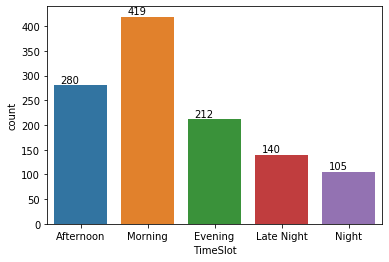

In [49]:
#Visualize TimeSlot
ax = sns.countplot(x="TimeSlot", data=TrainDataset)

for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### The above plot shows the count of TimeSlot column . Morning slot seem's to have the most amount of data.

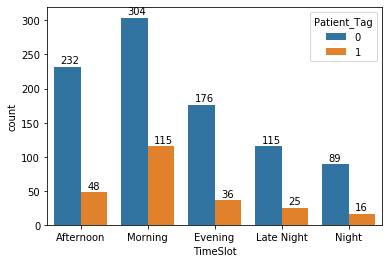

In [50]:
ax = sns.countplot(x="TimeSlot", hue="Patient_Tag", data=TrainDataset)

for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### The above plot shows the count of TimeSlot column corresponding to each tag. This shows that there is relation in TimeSlot and tag. Moreover Morning slot has the most information.

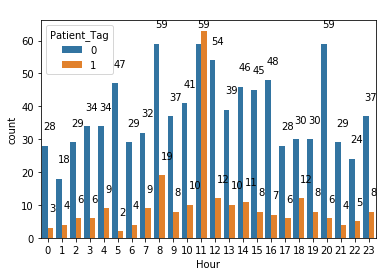

In [51]:
#Visualize Hours
ax = sns.countplot(x="Hour", hue="Patient_Tag", data=TrainDataset)

for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### The above plot shows the count of Hour column corresponding to each tag.  11th hour has most information. Moreover on comparing TimeSlot vs Hour, it better to use TimeSlot as it has less unique values and is showing same information with respect to Patient_Tag.

In [52]:
# Convert TimeSlot to a numerical variable
DummiesTimeSlotTrain = pd.get_dummies(TrainDataset['TimeSlot'], prefix = 'TimeSlot')
DummiesTimeSlotTrain.head()

,TimeSlot_Afternoon,TimeSlot_Evening,TimeSlot_Late Night,TimeSlot_Morning,TimeSlot_Night
0,1,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [53]:
DummiesTimeSlotTest = pd.get_dummies(TestDataset['TimeSlot'], prefix = 'TimeSlot')
DummiesTimeSlotTest.head()

,TimeSlot_Afternoon,TimeSlot_Evening,TimeSlot_Late Night,TimeSlot_Morning,TimeSlot_Night
0,0,0,0,0,1
1,0,0,0,0,1
2,1,0,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [54]:
#Avoid Dummy variable trap
DummiesTimeSlotTrain = DummiesTimeSlotTrain.drop('TimeSlot_Afternoon', axis=1)
DummiesTimeSlotTest = DummiesTimeSlotTest.drop('TimeSlot_Afternoon', axis=1)

In [55]:
#Add the numerical data to original dataset
TrainDataset = pd.concat([TrainDataset, DummiesTimeSlotTrain], axis=1)
TestDataset = pd.concat([TestDataset, DummiesTimeSlotTest], axis=1)

In [56]:
#Drop TimeSlot, Hour as data is extracted from it
TrainDataset.drop(['TimeSlot', 'Hour'],axis=1,inplace=True)
TestDataset.drop(['TimeSlot', 'Hour'],axis=1,inplace=True)

In [57]:
TrainDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1156 entries, 0 to 1156
Data columns (total 11 columns):
Title                  940 non-null object
TRANS_CONV_TEXT        1156 non-null object
Patient_Tag            1156 non-null int64
Month                  1156 non-null int64
Source_facebook        1156 non-null uint8
Source_forums          1156 non-null uint8
Source_youtube         1156 non-null uint8
TimeSlot_Evening       1156 non-null uint8
TimeSlot_Late Night    1156 non-null uint8
TimeSlot_Morning       1156 non-null uint8
TimeSlot_Night         1156 non-null uint8
dtypes: int64(2), object(2), uint8(7)
memory usage: 93.1+ KB


In [58]:
TestDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 12 columns):
Index                  571 non-null int64
Title                  454 non-null object
TRANS_CONV_TEXT        571 non-null object
Unnamed: 9             1 non-null object
Month                  571 non-null int64
Source_facebook        571 non-null uint8
Source_forums          571 non-null uint8
Source_youtube         571 non-null uint8
TimeSlot_Evening       571 non-null uint8
TimeSlot_Late Night    571 non-null uint8
TimeSlot_Morning       571 non-null uint8
TimeSlot_Night         571 non-null uint8
dtypes: int64(2), object(3), uint8(7)
memory usage: 26.3+ KB


In [59]:
#Visulize TRANS_CONV_TEXT
TrainDataset.TRANS_CONV_TEXT.str.len().describe()

count     1156.000000
mean      1851.491349
std       2324.415684
min          2.000000
25%        379.750000
50%        964.000000
75%       2441.250000
max      16000.000000
Name: TRANS_CONV_TEXT, dtype: float64

In [60]:
TrainDataset['Title'] = TrainDataset['Title'].fillna("")
TestDataset['Title'] = TestDataset['Title'].fillna("")

In [61]:
#Create a column Merged that contains data of Title and TRANS_CONV_TEXT
TrainDataset['Merged'] = TrainDataset['Title'].str.cat(TrainDataset[['TRANS_CONV_TEXT']], sep=".")
TestDataset['Merged'] = TestDataset['Title'].str.cat(TestDataset[['TRANS_CONV_TEXT']], sep=".")

In [62]:
TrainDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1156 entries, 0 to 1156
Data columns (total 12 columns):
Title                  1156 non-null object
TRANS_CONV_TEXT        1156 non-null object
Patient_Tag            1156 non-null int64
Month                  1156 non-null int64
Source_facebook        1156 non-null uint8
Source_forums          1156 non-null uint8
Source_youtube         1156 non-null uint8
TimeSlot_Evening       1156 non-null uint8
TimeSlot_Late Night    1156 non-null uint8
TimeSlot_Morning       1156 non-null uint8
TimeSlot_Night         1156 non-null uint8
Merged                 1156 non-null object
dtypes: int64(2), object(3), uint8(7)
memory usage: 102.1+ KB


In [63]:
TestDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 13 columns):
Index                  571 non-null int64
Title                  571 non-null object
TRANS_CONV_TEXT        571 non-null object
Unnamed: 9             1 non-null object
Month                  571 non-null int64
Source_facebook        571 non-null uint8
Source_forums          571 non-null uint8
Source_youtube         571 non-null uint8
TimeSlot_Evening       571 non-null uint8
TimeSlot_Late Night    571 non-null uint8
TimeSlot_Morning       571 non-null uint8
TimeSlot_Night         571 non-null uint8
Merged                 571 non-null object
dtypes: int64(2), object(4), uint8(7)
memory usage: 30.8+ KB


## Model Building and Evaluation

In [64]:
import re
import nltk
from nltk.corpus import stopwords
from textblob import Word
from nltk.stem import PorterStemmer
stop = stopwords.words("english")
PS = PorterStemmer()

In [65]:
#Preprocessing of TrainDataset['Merged']
#Lower case
TrainDataset.loc[:,'Merged'] = TrainDataset['Merged'].apply(lambda x: str.lower(x))
#Remove punctuation
import re
TrainDataset.loc[:,'Merged'] = TrainDataset['Merged'].apply(lambda x : " ".join(re.findall('[\w]+',x)))
#Removing stopwords
TrainDataset.loc[:,'Merged'] = TrainDataset['Merged'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#Lammentization
TrainDataset.loc[:,'Merged'] = TrainDataset['Merged'].apply(lambda x: " ".join([Word(myword).lemmatize() for myword in x.split()]))
#Stemming
TrainDataset.loc[:,'Merged'] = TrainDataset['Merged'].apply(lambda words: " ".join([PS.stem(word) for word in words.split()]))

In [66]:
#Preprocessing of TestDataset['Merged']
#Lower case
TestDataset.loc[:,'Merged'] = TestDataset['Merged'].apply(lambda x: str.lower(x))
#Remove punctuation
TestDataset.loc[:,'Merged'] = TestDataset['Merged'].apply(lambda x : " ".join(re.findall('[\w]+',x)))
#Removing stopwords
TestDataset.loc[:,'Merged'] = TestDataset['Merged'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#Lammentization
TestDataset.loc[:,'Merged'] = TestDataset['Merged'].apply(lambda x: " ".join([Word(myword).lemmatize() for myword in x.split()]))
#Stemming
TestDataset.loc[:,'Merged'] = TestDataset['Merged'].apply(lambda words: " ".join([PS.stem(word) for word in words.split()]))

In [67]:
Merged_most_freq_words = pd.Series(" ".join(TrainDataset['Merged']).split()).value_counts()
print(Merged_most_freq_words.head(50))

heart        3578
failur       1661
patient      1261
diseas       1026
blood        1023
studi         869
year          830
medic         798
use           781
also          776
health        766
time          753
caus          725
one           719
may           714
risk          708
drug          669
get           634
peopl         630
like          629
2             609
help          595
pressur       590
http          568
said          562
treatment     556
research      551
1             544
includ        543
new           517
day           502
take          498
first         495
high          489
2016          489
bodi          482
need          482
increas       475
go            472
life          472
hospit        471
would         465
effect        463
3             425
make          422
death         421
cell          419
clinic        416
die           410
could         410
dtype: int64


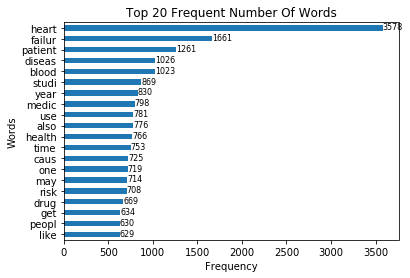

In [68]:
FreqPlot = Merged_most_freq_words.head(20).sort_values(ascending = True).plot(kind="barh",title = "Top 20 Frequent Number Of Words")
import matplotlib.pyplot as plt
plt.style.use("ggplot")
FreqPlot.set_xlabel("Frequency")
FreqPlot.set_ylabel("Words")
totals = []
for i in FreqPlot.patches:
    totals.append(i.get_width())
for i in FreqPlot.patches:
    FreqPlot.text(i.get_width()+.3,i.get_y()+0.1,str(i.get_width()),fontsize = 8,color= 'black')

In [69]:
TrainCorpus = []
for Merged in TrainDataset['Merged']:
    TrainCorpus.append(Merged)
TestCorpus = []
for Merged in TestDataset['Merged']:
    TestCorpus.append(Merged)

In [70]:
#Tuning Hyperparameters of TFIDF Vectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
lr = LogisticRegression(random_state=1)
Train_Y=TrainDataset['Patient_Tag']

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
acc_df = pd.DataFrame()
def tfidf_vec_max_features(params, TrainCorpus, Train_Y):
    tfidf  = TfidfVectorizer(max_features=params,ngram_range=(1,1))
    tfidf.fit(TrainCorpus)
    MergedArrayTrain = tfidf.transform(TrainCorpus)
    Train_X=np.column_stack((TrainDataset['Source_facebook'],TrainDataset['Source_forums'],TrainDataset['Source_youtube'],TrainDataset['Month'],TrainDataset['TimeSlot_Evening'], TrainDataset['TimeSlot_Late Night'], TrainDataset['TimeSlot_Morning'], TrainDataset['TimeSlot_Night'], MergedArrayTrain.toarray()))
    Score = cross_val_score(lr, Train_X , Train_Y, cv=3)
    return Score.mean()

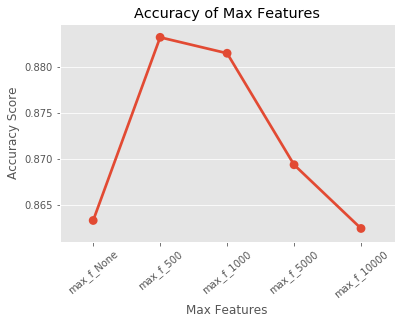

In [72]:
mf_params = [None, 500, 1000, 5000, 10000]
max_features_scores = [tfidf_vec_max_features(p, TrainCorpus, Train_Y) for p in mf_params]
max_features = ['max_f_'+str(p) for p in mf_params]
max_features_df = pd.DataFrame({'params':max_features, 'scores':max_features_scores}, index=[0,1,2,3,4])
acc_df = pd.DataFrame()
max_features_df = max_features_df.append(acc_df.iloc[:1,:])
sns.pointplot(x='params', y='scores', data =max_features_df)
plt.ylabel('Accuracy Score')
plt.xlabel('Max Features')
plt.xticks(rotation=40)
plt.title('Accuracy of Max Features')
plt.show()

### The above plot shows that max_features=500 has maximum accuracy

In [73]:
def tfidf_vec_ngram(params, TrainCorpus, Train_Y):
    tfidf  = TfidfVectorizer(max_features=500, ngram_range=params)
    tfidf.fit(TrainCorpus)
    MergedArrayTrain = tfidf.transform(TrainCorpus)
    Train_X=np.column_stack((TrainDataset['Source_facebook'],TrainDataset['Source_forums'],TrainDataset['Source_youtube'],TrainDataset['Month'],TrainDataset['TimeSlot_Evening'], TrainDataset['TimeSlot_Late Night'], TrainDataset['TimeSlot_Morning'], TrainDataset['TimeSlot_Night'], MergedArrayTrain.toarray()))
    Score = cross_val_score(lr, Train_X , Train_Y, cv=3) 
    return Score.mean()

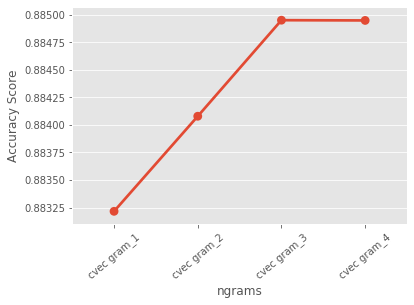

In [74]:
params = [(1,1), (1,2),(1,3), (1,4)] 
ngram_scores = []
for p in params:
    ngram_scores.append(tfidf_vec_ngram(p, TrainCorpus, Train_Y))    
ngrams = ['cvec gram_1','cvec gram_2','cvec gram_3','cvec gram_4']
ngram_df = pd.DataFrame({'params':ngrams, 'scores':ngram_scores}, index=[0,1,2,3])
acc_df = pd.DataFrame()
ngram_df = ngram_df.append(acc_df.iloc[:1,:])
sns.pointplot(x='params', y='scores', data =ngram_df)
plt.ylabel('Accuracy Score')
plt.xlabel('ngrams')
plt.xticks(rotation=40)
plt.show()

### The above plot shows that ngram_range=(1,3) has maximum accuracy.

In [75]:
# Creating the model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf  = TfidfVectorizer(ngram_range=(1,3),max_features=500)
tfidf.fit(TrainCorpus)
MergedArrayTrain = tfidf.transform(TrainCorpus)
MergedArrayTest= tfidf.transform(TestCorpus)

In [76]:
Train_X=np.column_stack((TrainDataset['Source_facebook'],TrainDataset['Source_forums'],TrainDataset['Source_youtube'],TrainDataset['Month'],TrainDataset['TimeSlot_Evening'], TrainDataset['TimeSlot_Late Night'], TrainDataset['TimeSlot_Morning'], TrainDataset['TimeSlot_Night'], MergedArrayTrain.toarray()))

In [77]:
TrainDataset.corr()

,Patient_Tag,Month,Source_facebook,Source_forums,Source_youtube,TimeSlot_Evening,TimeSlot_Late Night,TimeSlot_Morning,TimeSlot_Night
Patient_Tag,1.000000,0.283386,0.211823,0.238863,-0.095645,-0.044166,-0.026579,0.124275,-0.043041
Month,0.283386,1.000000,0.089415,0.148396,0.046042,0.009026,0.058533,-0.043074,-0.003900
Source_facebook,0.211823,0.089415,1.000000,-0.283242,-0.045236,0.031895,-0.043489,-0.025159,-0.010704
Source_forums,0.238863,0.148396,-0.283242,1.000000,-0.218617,0.006765,0.038118,0.021420,0.038552
Source_youtube,-0.095645,0.046042,-0.045236,-0.218617,1.000000,-0.063788,-0.025306,-0.011320,-0.025716
TimeSlot_Evening,-0.044166,0.009026,0.031895,0.006765,-0.063788,1.000000,-0.175913,-0.357318,-0.149787
TimeSlot_Late Night,-0.026579,0.058533,-0.043489,0.038118,-0.025306,-0.175913,1.000000,-0.279892,-0.117330
TimeSlot_Morning,0.124275,-0.043074,-0.025159,0.021420,-0.011320,-0.357318,-0.279892,1.000000,-0.238323
TimeSlot_Night,-0.043041,-0.003900,-0.010704,0.038552,-0.025716,-0.149787,-0.117330,-0.238323,1.000000


In [78]:
Train_Y=TrainDataset['Patient_Tag']

In [79]:
np.random.seed(0)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Train_X, Train_Y, test_size = 0.20, random_state = 0)

In [80]:
#In order the solve the problem of unbalanced dataset
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27)
X_train, Y_train = sm.fit_sample(X_train, Y_train)

In [81]:
#Classification Technique 1
print('Classification Technique 1 : ')
#Create the classifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
ClassifierKNN = KNeighborsClassifier()
#Train the classifier 
ClassifierKNN.fit(X_train,Y_train)
print('K Nearest Neighbor')
#Predict on test data
PredictKNN = ClassifierKNN.predict(X_test)
#Confusion Matrix
print ('Confusion Matrix:')
print(confusion_matrix(Y_test, PredictKNN))
#Checking the accuracy if prediction of test data is correct
print ('Accuracy: ',cross_val_score(ClassifierKNN ,X_train,Y_train,cv = 5, scoring='accuracy').mean())
print('Classification Report:')       
print(classification_report(Y_test, PredictKNN))
ProbabilitiesKNN = ClassifierKNN.predict_proba(X_test)[:,1]
FPRKNN, TPRKNN, _ = roc_curve(Y_test, ProbabilitiesKNN)
RocAucKNN = auc(FPRKNN, TPRKNN)

Classification Technique 1 : 
K Nearest Neighbor
Confusion Matrix:
[[109  73]
 [  6  44]]
Accuracy:  0.790190615495345
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.60      0.73       182
           1       0.38      0.88      0.53        50

    accuracy                           0.66       232
   macro avg       0.66      0.74      0.63       232
weighted avg       0.82      0.66      0.69       232



In [82]:
#Classification Technique 2
print('Classification Technique 2 :')
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
#Create the classifier
ClassifierDecisionTree = DecisionTreeClassifier()
#Train the classifier 
ClassifierDecisionTree.fit(X_train,Y_train)
print('Decision Tree')
#Predict on test data
PredictDecisionTree = ClassifierDecisionTree.predict(X_test)
#Confusion Matrix
print ('Confusion Matrix:')
print(confusion_matrix(Y_test, PredictDecisionTree))
#Checking the accuracy if prediction of test data is correct
print ('Accuracy: ', (cross_val_score(ClassifierDecisionTree ,X_train,Y_train,cv = 5, scoring='accuracy')).mean())
print('Classification Report:')       
print(classification_report(Y_test, PredictDecisionTree))
ProbabilitiesDT = ClassifierDecisionTree.predict_proba(X_test)[:,1]
FPRDT, TPRDT, _ = roc_curve(Y_test, ProbabilitiesDT)
RocAucDT = auc(FPRDT, TPRDT)

Classification Technique 2 :
Decision Tree
Confusion Matrix:
[[155  27]
 [ 23  27]]
Accuracy:  0.8726567760209886
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       182
           1       0.50      0.54      0.52        50

    accuracy                           0.78       232
   macro avg       0.69      0.70      0.69       232
weighted avg       0.79      0.78      0.79       232



In [83]:
#Classification Technique 3
print('Classification Technique 3 : ')
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#Create the classifier
ClassifierRandomForest = RandomForestClassifier()
#Train the classifier 
ClassifierRandomForest.fit(X_train,Y_train)
print('Random Forest')
#Predict on test data
PredictRandomForest = ClassifierRandomForest.predict(X_test)
#Confusion Matrix
print ('Confusion Matrix:')
print(confusion_matrix(Y_test, PredictRandomForest))
#Checking the accuracy if prediction of test data is correct
print ('Accuracy: ', (cross_val_score(ClassifierRandomForest ,X_train,Y_train,cv = 5, scoring='accuracy')).mean())
print('Classification Report:')       
print(classification_report(Y_test, PredictRandomForest))
ProbabilitiesRF = ClassifierRandomForest.predict_proba(X_test)[:,1]
FPRRF, TPRRF, _ = roc_curve(Y_test, ProbabilitiesRF)
RocAucRF = auc(FPRRF, TPRRF)

Classification Technique 3 : 
Random Forest
Confusion Matrix:
[[168  14]
 [ 22  28]]
Accuracy:  0.9448584894708738
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       182
           1       0.67      0.56      0.61        50

    accuracy                           0.84       232
   macro avg       0.78      0.74      0.76       232
weighted avg       0.84      0.84      0.84       232



In [84]:
#Classification Technique 4
print('Classification Technique 4 : ')
#Support Vector Machine
from sklearn import svm
#Create the Classifier
ClassifierSVM = svm.SVC(C = 10, gamma = 0.1, probability = True)
#Train the Classifier 
ClassifierSVM.fit(X_train,Y_train)
print('Support Vector Machine')
#Predict on test data
PredictSVM = ClassifierSVM.predict(X_test)
#Confusion Matrix
print ('Confusion Matrix:')
print(confusion_matrix(Y_test, PredictSVM))
#Checking the accuracy if prediction of test data is correct
print ('Accuracy: ', (cross_val_score(ClassifierSVM ,X_train,Y_train,cv = 5, scoring='accuracy')).mean())
print('Classification Report: ')       
print(classification_report(Y_test, PredictSVM))
ProbabilitiesSVM = ClassifierSVM.predict_proba(X_test)[:,1]
FPRSVM, TPRSVM, _ = roc_curve(Y_test, ProbabilitiesSVM)
RocAucSVM = auc(FPRSVM, TPRSVM)

Classification Technique 4 : 
Support Vector Machine
Confusion Matrix:
[[166  16]
 [ 12  38]]
Accuracy:  0.9693598941282998
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       182
           1       0.70      0.76      0.73        50

    accuracy                           0.88       232
   macro avg       0.82      0.84      0.83       232
weighted avg       0.88      0.88      0.88       232



In [85]:
#Classification Technique 5
print('Classification Technique 5 : ')
#Support Vector Machine poly kernel
from sklearn import svm
#Create the classifier
clf = svm.SVC(kernel='poly',C=10,gamma = 0.1, probability = True)
#Train the classifier 
clf.fit(X_train,Y_train) 
print('SVM Classifier with poly function ')
#Predict on test data
Predictclf = clf.predict(X_test)
#Confusion Matrix
print ('Confusion Matrix:\n')
print(confusion_matrix(Y_test, Predictclf))
#Checking the accuracy if prediction of test data is correct
print ('Accuracy: ',(cross_val_score(clf ,X_train,Y_train,cv = 5, scoring='accuracy')).mean())
print('Classification Report: \n')       
print(classification_report(Y_test, Predictclf))
ProbabilitiesSVMP = clf.predict_proba(X_test)[:,1]
FPRSVMP, TPRSVMP, _ = roc_curve(Y_test, ProbabilitiesSVMP)
RocAucSVMP = auc(FPRSVMP, TPRSVMP)

Classification Technique 5 : 
SVM Classifier with poly function 
Confusion Matrix:

[[165  17]
 [ 19  31]]
Accuracy:  0.9591349167653409
Classification Report: 

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       182
           1       0.65      0.62      0.63        50

    accuracy                           0.84       232
   macro avg       0.77      0.76      0.77       232
weighted avg       0.84      0.84      0.84       232



In [86]:
#Classification Technique 6
print('Classification Technique 6 : ')
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
#Create and train the classifier
ClassifierLR = LogisticRegression(random_state=0).fit(X_train,Y_train)
print("Logistic Regression")
#Predict on test data
PredictLR = ClassifierLR.predict(X_test)
#Confusion Matrix
print ('Confusion Matrix:')
print(confusion_matrix(Y_test, PredictLR))
#Checking the accuracy if prediction of test data is correct
print ('Accuracy: ', (cross_val_score(ClassifierLR ,X_train,Y_train,cv = 5, scoring='accuracy')).mean())
print('Classification Report:')       
print(classification_report(Y_test, PredictLR))
ProbabilitiesLR = ClassifierLR.predict_proba(X_test)[:,1]
FPRLR, TPRLR, _ = roc_curve(Y_test, ProbabilitiesLR)
RocAucLR = auc(FPRLR, TPRLR)

Classification Technique 6 : 
Logistic Regression
Confusion Matrix:
[[161  21]
 [  9  41]]


/Users/kashikapuri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/kashikapuri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

Accuracy:  0.9230340600403985
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       182
           1       0.66      0.82      0.73        50

    accuracy                           0.87       232
   macro avg       0.80      0.85      0.82       232
weighted avg       0.89      0.87      0.88       232



/Users/kashikapuri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [87]:
#Classification Technique 7
print('Classification Technique 7 : ')
#Gradient Boosting model
from sklearn.ensemble import GradientBoostingClassifier
#Create and train the classifier
ClassifierGBC = GradientBoostingClassifier(random_state=0).fit(X_train,Y_train)
print("GradientBoostingClassifier")
#Predict on test data
PredictGBC = ClassifierGBC.predict(X_test)
#Confusion Matrix
print ('Confusion Matrix:')
print(confusion_matrix(Y_test, PredictGBC))
#Checking the accuracy if prediction of test data is correct
print ('Accuracy: ', (cross_val_score(ClassifierGBC ,X_train,Y_train,cv = 5, scoring='accuracy')).mean())
print('Classification Report:')       
print(classification_report(Y_test, PredictGBC))
ProbabilitiesGB = ClassifierGBC.predict_proba(X_test)[:,1]
FPRGB, TPRGB, _ = roc_curve(Y_test, ProbabilitiesGB)
RocAucGB = auc(FPRGB, TPRGB)

Classification Technique 7 : 
GradientBoostingClassifier
Confusion Matrix:
[[170  12]
 [ 16  34]]
Accuracy:  0.9469039492930278
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       182
           1       0.74      0.68      0.71        50

    accuracy                           0.88       232
   macro avg       0.83      0.81      0.82       232
weighted avg       0.88      0.88      0.88       232



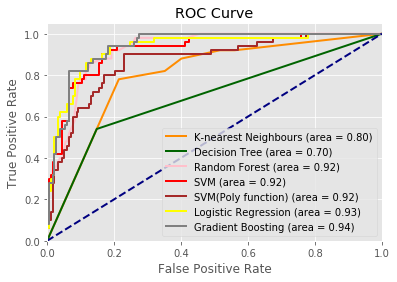

In [88]:
#Plot the ROC Curve
plt.figure()
plt.plot(FPRKNN, TPRKNN, color='darkorange',
         lw=2, label='K-nearest Neighbours (area = %0.2f)' % RocAucKNN)
plt.plot(FPRDT, TPRDT, color='darkgreen',
         lw=2, label='Decision Tree (area = %0.2f)' % RocAucDT)
plt.plot(FPRRF, TPRRF, color='pink',
         lw=2, label='Random Forest (area = %0.2f)' % RocAucRF)
plt.plot(FPRSVM, TPRSVM, color='red',
         lw=2, label='SVM (area = %0.2f)' % RocAucRF)
plt.plot(FPRSVMP, TPRSVMP, color='brown',
         lw=2, label='SVM(Poly function) (area = %0.2f)' % RocAucRF)
plt.plot(FPRLR, TPRLR, color='yellow',
         lw=2, label='Logistic Regression (area = %0.2f)' % RocAucLR)
plt.plot(FPRGB, TPRGB, color='grey',
         lw=2, label='Gradient Boosting (area = %0.2f)' % RocAucGB)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Precision, Recall, F1-score, Accuaracy, Area under ROC Curve are the parameters used for model evaluation. Accuarcy of Support Vector Machine is greatest whereas Area under ROC is highest for gradient boosting classifier. They both are having almost same results. For my model I have used gradient boosting classifier as it works well if the classes are unbalanced.

In [89]:
Train_X=np.column_stack((TrainDataset['Source_facebook'],TrainDataset['Source_forums'],TrainDataset['Source_youtube'],TrainDataset['Month'],TrainDataset['TimeSlot_Evening'], TrainDataset['TimeSlot_Late Night'], TrainDataset['TimeSlot_Morning'], TrainDataset['TimeSlot_Night'], MergedArrayTrain.toarray()))

In [90]:
Train_Y=TrainDataset['Patient_Tag']

In [91]:
Test_X=np.column_stack((TestDataset['Source_facebook'],TestDataset['Source_forums'],TestDataset['Source_youtube'], TestDataset['Month'],TestDataset['TimeSlot_Evening'], TestDataset['TimeSlot_Late Night'], TestDataset['TimeSlot_Morning'], TestDataset['TimeSlot_Night'], MergedArrayTest.toarray()))

In [92]:
#For unbalanced dataset
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27)
Train_X, Train_Y = sm.fit_sample(Train_X, Train_Y)

In [93]:
#Gradient Boosting model
from sklearn.ensemble import GradientBoostingClassifier
#Create and train the classifier
ClassifierGBC = GradientBoostingClassifier(random_state=0).fit(Train_X,Train_Y)
#Predict on test data
PredictGBC = ClassifierGBC.predict(Test_X)

In [94]:
Patient_Tag=pd.DataFrame({'Patient_Tag': PredictGBC})

In [95]:
TestOutput=pd.concat([TestDataset, pd.DataFrame(PredictGBC)], axis=1)

In [96]:
TestOutput.to_csv (r'TestOutput.csv', index = None, header=True)

In [97]:
FinalOutput=pd.concat([TestDataset['Index'], Patient_Tag], axis=1)

In [98]:
FinalOutput.to_csv (r'sample_submission.csv', index = None, header=True)